# 신경망을 이용한 구조

In [47]:
import pandas as pd
import tensorflow as tf
# tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [49]:
(xtrain, ytrain), (xtest, ytest)= tf.keras.datasets.fashion_mnist.load_data()

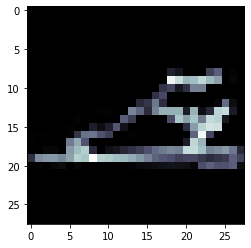

In [50]:
xtrain.shape
plt.imshow(xtrain[300], plt.cm.bone)

In [51]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

train -> 훈련 -> 모델  
test ----------> 입력 -> 분류 결과(yhat)  
                            정답(ytest)  
정확도는 ?   

In [52]:
xtrain=xtrain.reshape(60000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [57]:
model = Sequential()
model.add(Dense(units =256, input_dim = 28*28, activation= 'relu')) # 레이어 설계, 입력데이터의 차원
# 입력 =784, 출력=인 레이어 추가 

model.add(Dense(units = 128, activation= 'relu')) # 레이어 설계, 히든 계층
model.add(Dense(units = 64, activation= 'relu')) # 레이어 설계, 히든 계층
model.add(Dense(units = 10, activation= 'softmax')) # 출력 값

In [58]:
# 3번 모델 학습과정 설정 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy']) # loss == cost
hist = model.fit(xtrain, ytrain, batch_size=32,  epochs=500)

Epoch 1/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8164 - accuracy: 0.6996
Epoch 2/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5430 - accuracy: 0.8047
Epoch 3/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4856 - accuracy: 0.8257
Epoch 4/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4454 - accuracy: 0.8374
Epoch 5/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4130 - accuracy: 0.8486
Epoch 6/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3922 - accuracy: 0.8558
Epoch 7/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3751 - accuracy: 0.8626
Epoch 8/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3619 - accuracy: 0.8666
Epoch 9/500
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3494 - accuracy: 0.8719
Epoch 10/500
1875/1875 [==============================] - 3s 1ms/step - l

In [55]:
yhat = model.predict(xtest[0:1])
yhat # yhat을 모두 더하면, 1이 나옴 왜냐? 확률이기 때문에!
# ytest[0:1]
yhat[0]

array([1.4727990e-03, 2.0281682e-04, 2.7930317e-04, 1.0618994e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.2921293e-05, 7.0376956e-04, 0.0000000e+00,
       8.9506235e-04, 0.0000000e+00, 2.9403402e-04, 4.0471452e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0952235e-03, 2.2133117e-04,
       0.0000000e+00, 1.6516584e-04, 0.0000000e+00, 1.2990159e-03,
       8.5565069e-04, 0.0000000e+00, 1.5845519e-03, 0.0000000e+00,
       0.0000000e+00, 1.7442770e-05, 1.3125342e-04, 5.0131383e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.9612380e-04,
       0.0000000e+00, 1.7621912e-04, 4.5121994e-04, 0.0000000e+00,
       3.6956614e-04, 0.0000000e+00, 0.0000000e+00, 1.2546938e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.7010948e-04, 0.0000000e+00, 0.0000000e+00, 4.0440657e-04,
       7.3923613e-04, 1.7862739e-03, 0.0000000e+00, 0.0000000e

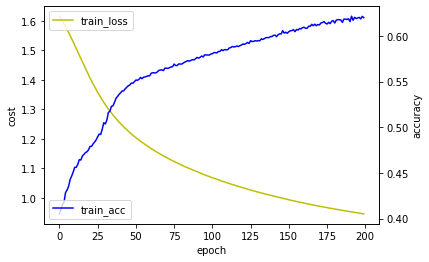

In [56]:
fig, axes = plt.subplots()
accax = axes.twinx() # 윈도우 하나에 여러개 그릴 수 있음
axes.plot(hist.history['loss'], 'y', label = 'train_loss')
# axes.plot(hist.history['val_loss'], 'r', label = 'val_loss')
accax.plot(hist.history['accuracy'], 'b', label = 'train_acc')
# accax.plot(hist.history['val_acc'], 'g', label = 'val_acc')

axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('accuracy')
axes.legend(loc = 'upper left')
accax.legend(loc = 'lower left')